In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
# Import libraries required for analysis
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load stroke-prediction dataset using pandas
df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [4]:
# Get top 5 rows of data to gain intution of structure of dataset
# head(10) - output will be 10 rows from starting
# default value - 5
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# statistical data of each numeric feature of dataset
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# check if data is balance or imbalance dataset
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

**count of 0(person which had not stroke) is much greater than count of 1(stroke affected person).so this is imbalance dataset.**

# Missing/Null Values 

In [8]:
# check if any column has null values  
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

As you observed all features have null count zero but bmi has 201 null values.There are some ways to fill these null values according to situation :
* if count of null values is high(with respect to total count).Then we just remove that feature/col.
* if count is less then we will fill with mean or median of that column.

In this example 201 is null out of 5110,so it is not much high. In this case we can fill either mean or median in place these 201 values. if distribution of bmi is not skewed much(either positive or negative) then we can use mean, otherwise meadian.so first check distribution plot of bmi :

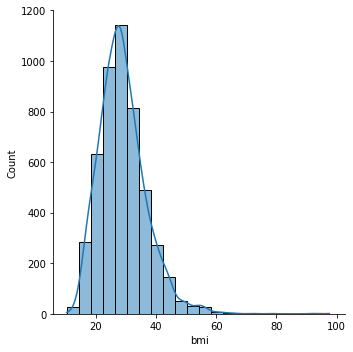

In [9]:
# Distribution plot
sns.displot(df,x='bmi',binwidth=4,kde=True)

In [10]:
# As distribution is not very skewed, so we just fill mean.
df['bmi'].fillna(value=df['bmi'].mean(),inplace=True)

# Exploratory Data Analysis

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

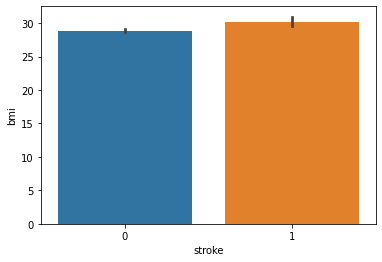

In [11]:
sns.barplot(data=df,x='stroke',y='bmi')

<AxesSubplot:xlabel='age', ylabel='Count'>

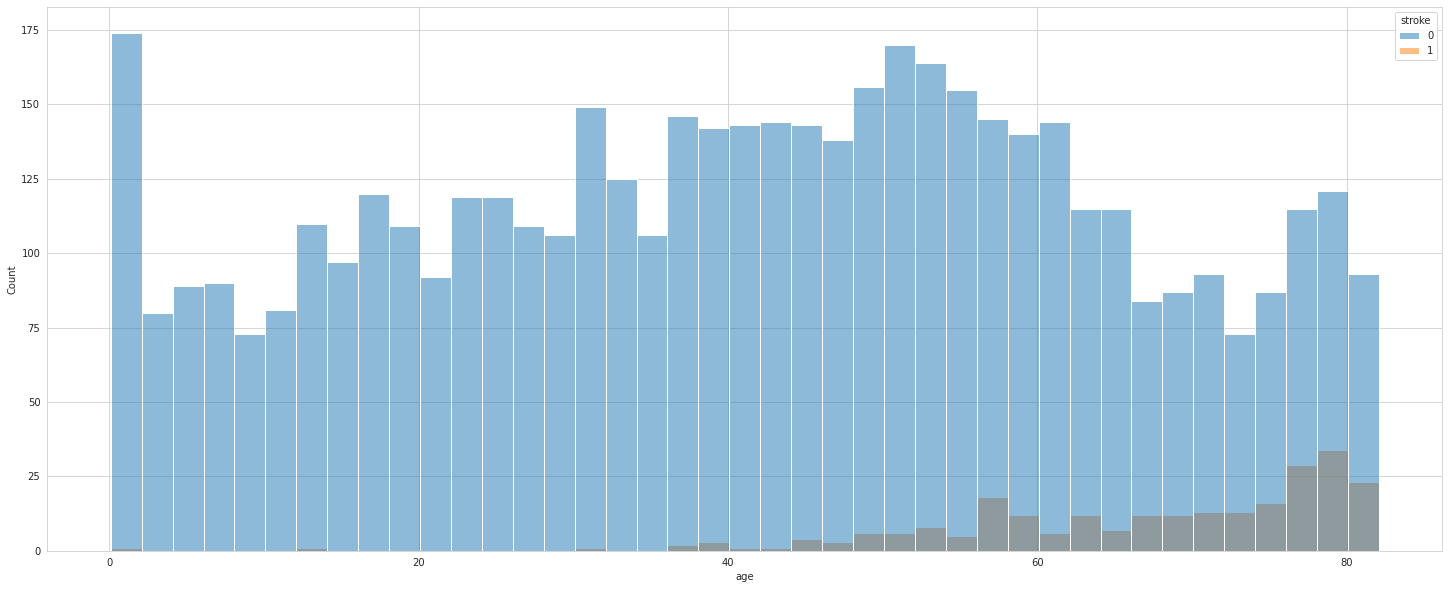

In [12]:
plt.figure(figsize=(25,10))
sns.set_style(style='whitegrid')
sns.histplot(data=df,x='age',bins=30,binwidth=2,hue='stroke')

<AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>

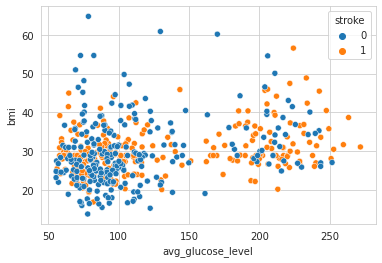

In [13]:
sns.scatterplot(data=df[:500],x='avg_glucose_level',y='bmi',hue='stroke')